In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Parámetros
n_iter = 10000  # Número de iteraciones
samples = np.zeros(n_iter)  # Inicializar las muestras
current_sample = 0  # Empezar desde 0
proposal_width = 1  # Distribución de propuesta uniforme en [-1, 1]

In [3]:
# Función de densidad de la distribución objetivo (N(0,1))
def target_distribution(x):
    return norm.pdf(x, loc=0, scale=1)

In [4]:
# Algoritmo de Metropolis-Hastings
for i in range(1, n_iter):
    # Proponer una nueva muestra de una distribución uniforme
    proposal = current_sample + np.random.uniform(-proposal_width, proposal_width)
    
    # Calcular la tasa de aceptación
    acceptance_ratio = target_distribution(proposal) / target_distribution(current_sample)
    
    # Aceptar o rechazar la propuesta
    if np.random.rand() < acceptance_ratio:
        current_sample = proposal
    
    samples[i] = current_sample

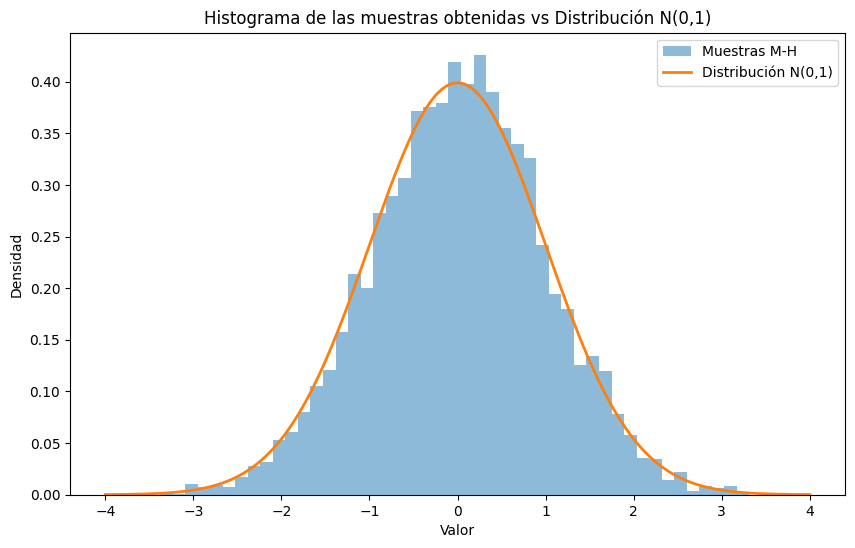

In [5]:
# Comparación: Histograma de las muestras y la verdadera distribución N(0,1)
x = np.linspace(-4, 4, 1000)
plt.figure(figsize=(10,6))
plt.hist(samples, bins=50, density=True, alpha=0.5, label='Muestras M-H')
plt.plot(x, norm.pdf(x, loc=0, scale=1), label='Distribución N(0,1)', lw=2)
plt.title("Histograma de las muestras obtenidas vs Distribución N(0,1)")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.legend()
plt.show()